In [4]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
print(gpu_devices)
for device in gpu_devices:
    tf.config.experimental.set_memory_growth(device, True)
#from tensorflow.keras.mixed_precision import experimental as mixed_precision
#policy = mixed_precision.Policy('mixed_float16')
#mixed_precision.set_policy(policy)


import matplotlib.pyplot as plt
import os
import re
from glob import glob
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
import datetime
np.random.seed(42)
tf.random.set_seed(42)

print("Tensorflow version " + tf.__version__)
print("tf.keras version " + tf.keras.__version__)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Tensorflow version 2.4.0
tf.keras version 2.4.0


In [3]:
!pip install pandas
!pip install scikit-learn

     |████████████████████████████████| 9.5 MB 12.3 MB/s eta 0:00:01
     |████████████████████████████████| 510 kB 10.1 MB/s eta 0:00:01
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
     |████████████████████████████████| 22.2 MB 1.2 MB/s eta 0:00:01    |████████████▍                   | 8.6 MB 4.8 MB/s eta 0:00:03
     |████████████████████████████████| 25.9 MB 2.8 MB/s eta 0:00:01
     |████████████████████████████████| 302 kB 6.1 MB/s eta 0:00:01
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [2]:
os.getcwd()

'/tf/pombeye'

In [3]:
os.listdir()

['pombEye_v3_large.ipynb',
 'pombEye_mobilenetv3.h5',
 'pombEye_efficientnetB1.h5',
 'logs',
 'images',
 'pombEye_efficientnet.h5',
 'pombEye_v3.ipynb',
 'pombEye_mobilenetv2.h5',
 '.ipynb_checkpoints']

In [4]:
IMG_PATH = "images"

In [5]:
result = [[y.split("/")[-2],os.path.join(y.split("/")[-2],y.split("/")[-1])] for x in os.walk(IMG_PATH) for y in glob(os.path.join(x[0], '*.jpg'))]

In [6]:
result[0]

['vacuole', 'vacuole/vacuole.205.jpg']

In [7]:
image_df = pd.DataFrame(result, columns = ['label', 'filename'])

In [8]:
image_df['label'].unique()

array(['vacuole', 'periphery', 'cytosol', 'mitochondrion',
       'endoplasmic_reticulum', 'golgi', 'nucleus', 'microtubules',
       'cytosol_and_nucleus'], dtype=object)

<AxesSubplot:>

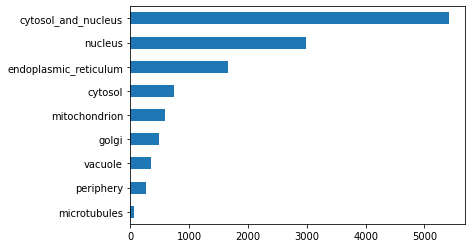

In [9]:
image_df['label'].value_counts().sort_values().plot(kind = 'barh')

In [10]:
image_df['label'].value_counts().sort_values()

microtubules               64
periphery                 263
vacuole                   347
golgi                     494
mitochondrion             591
cytosol                   743
endoplasmic_reticulum    1660
nucleus                  2984
cytosol_and_nucleus      5416
Name: label, dtype: int64

In [11]:
# split df into train and test
train_df, validation_df = train_test_split(image_df, test_size=0.05)
train_df, test_df = train_test_split(train_df, test_size=0.05)

In [12]:
train_df = train_df.reset_index(drop = True)
test_df = test_df.reset_index(drop = True)
validation_df = validation_df.reset_index(drop = True)

In [13]:
train_df.head()

,label,filename
0,endoplasmic_reticulum,endoplasmic_reticulum/endoplasmic_reticulum.14...
1,endoplasmic_reticulum,endoplasmic_reticulum/endoplasmic_reticulum.15...
2,endoplasmic_reticulum,endoplasmic_reticulum/endoplasmic_reticulum.64...
3,nucleus,nucleus/nucleus.2285.jpg
4,cytosol_and_nucleus,cytosol_and_nucleus/cytosol_and_nucleus.3063.jpg


In [14]:
train_count_dict = dict(train_df['label'].value_counts())
train_count_dict

{'cytosol_and_nucleus': 4892,
 'nucleus': 2722,
 'endoplasmic_reticulum': 1491,
 'cytosol': 664,
 'mitochondrion': 528,
 'golgi': 436,
 'vacuole': 303,
 'periphery': 240,
 'microtubules': 60}

In [15]:
test_count_dict = dict(test_df['label'].value_counts())
test_count_dict

{'cytosol_and_nucleus': 266,
 'nucleus': 120,
 'endoplasmic_reticulum': 74,
 'cytosol': 46,
 'mitochondrion': 29,
 'golgi': 28,
 'vacuole': 21,
 'periphery': 11,
 'microtubules': 2}

In [16]:
validation_count_dict = dict(validation_df['label'].value_counts())
validation_count_dict

{'cytosol_and_nucleus': 258,
 'nucleus': 142,
 'endoplasmic_reticulum': 95,
 'mitochondrion': 34,
 'cytosol': 33,
 'golgi': 30,
 'vacuole': 23,
 'periphery': 12,
 'microtubules': 2}

In [17]:
upsampled_train_df = train_df.copy()
upsampled_train_df

,label,filename
0,endoplasmic_reticulum,endoplasmic_reticulum/endoplasmic_reticulum.14...
1,endoplasmic_reticulum,endoplasmic_reticulum/endoplasmic_reticulum.15...
2,endoplasmic_reticulum,endoplasmic_reticulum/endoplasmic_reticulum.64...
3,nucleus,nucleus/nucleus.2285.jpg
4,cytosol_and_nucleus,cytosol_and_nucleus/cytosol_and_nucleus.3063.jpg
...,...,...
11331,cytosol_and_nucleus,cytosol_and_nucleus/cytosol_and_nucleus.4066.jpg
11332,cytosol_and_nucleus,cytosol_and_nucleus/cytosol_and_nucleus.3730.jpg
11333,nucleus,nucleus/nucleus.670.jpg
11334,cytosol_and_nucleus,cytosol_and_nucleus/cytosol_and_nucleus.4173.jpg


In [18]:
for organelle in train_count_dict:
    if train_count_dict[organelle] < 500:
        upsampled_train_df = pd.concat([upsampled_train_df, resample(upsampled_train_df[upsampled_train_df['label'] == organelle], replace=True, n_samples=500 - train_count_dict[organelle], random_state = 42)])

In [19]:
upsampled_train_df['label'].value_counts()

cytosol_and_nucleus      4892
nucleus                  2722
endoplasmic_reticulum    1491
cytosol                   664
mitochondrion             528
golgi                     500
microtubules              500
vacuole                   500
periphery                 500
Name: label, dtype: int64

In [20]:
downsampled_train_df = pd.DataFrame(columns = ['label', 'filename'])

In [21]:
for organelle in train_count_dict:
    if train_count_dict[organelle] < 3000 and train_count_dict[organelle] >= 500:
        row_count = train_count_dict[organelle]
    elif train_count_dict[organelle] < 500:
        row_count = 500
    else:
        row_count = 3000
    downsampled_train_df = pd.concat([downsampled_train_df, resample(upsampled_train_df[upsampled_train_df['label'] == organelle], replace=False, n_samples=row_count, random_state = 42)])

In [22]:
downsampled_train_df['label'].value_counts()

cytosol_and_nucleus      3000
nucleus                  2722
endoplasmic_reticulum    1491
cytosol                   664
mitochondrion             528
golgi                     500
microtubules              500
vacuole                   500
periphery                 500
Name: label, dtype: int64

In [23]:
downsampled_train_df

,label,filename
328,cytosol_and_nucleus,cytosol_and_nucleus/cytosol_and_nucleus.3108.jpg
196,cytosol_and_nucleus,cytosol_and_nucleus/cytosol_and_nucleus.4315.jpg
6135,cytosol_and_nucleus,cytosol_and_nucleus/cytosol_and_nucleus.3512.jpg
10197,cytosol_and_nucleus,cytosol_and_nucleus/cytosol_and_nucleus.3596.jpg
5617,cytosol_and_nucleus,cytosol_and_nucleus/cytosol_and_nucleus.2951.jpg
...,...,...
9344,microtubules,microtubules/microtubules.6.jpg
830,microtubules,microtubules/microtubules.57.jpg
10574,microtubules,microtubules/microtubules.10.jpg
4403,microtubules,microtubules/microtubules.44.jpg


In [24]:
conv_base = tf.keras.applications.Xception(
    include_top=False, weights='imagenet',
    input_shape=(299,299,3)
)

pombEye_xception= tf.keras.models.Sequential()

pombEye_xception.add(conv_base)

pombEye_xception.add(tf.keras.layers.GlobalAveragePooling2D())
pombEye_xception.add(tf.keras.layers.Dense(len(downsampled_train_df['label'].unique())))
pombEye_xception.add(tf.keras.layers.Activation('softmax', dtype='float32', name='pombEye_prediction'))


83689472/83683744 [==============================] - 8s 0us/step


In [25]:
for layer in conv_base.layers:
    print(layer.name)

input_1
block1_conv1
block1_conv1_bn
block1_conv1_act
block1_conv2
block1_conv2_bn
block1_conv2_act
block2_sepconv1
block2_sepconv1_bn
block2_sepconv2_act
block2_sepconv2
block2_sepconv2_bn
conv2d
block2_pool
batch_normalization
add
block3_sepconv1_act
block3_sepconv1
block3_sepconv1_bn
block3_sepconv2_act
block3_sepconv2
block3_sepconv2_bn
conv2d_1
block3_pool
batch_normalization_1
add_1
block4_sepconv1_act
block4_sepconv1
block4_sepconv1_bn
block4_sepconv2_act
block4_sepconv2
block4_sepconv2_bn
conv2d_2
block4_pool
batch_normalization_2
add_2
block5_sepconv1_act
block5_sepconv1
block5_sepconv1_bn
block5_sepconv2_act
block5_sepconv2
block5_sepconv2_bn
block5_sepconv3_act
block5_sepconv3
block5_sepconv3_bn
add_3
block6_sepconv1_act
block6_sepconv1
block6_sepconv1_bn
block6_sepconv2_act
block6_sepconv2
block6_sepconv2_bn
block6_sepconv3_act
block6_sepconv3
block6_sepconv3_bn
add_4
block7_sepconv1_act
block7_sepconv1
block7_sepconv1_bn
block7_sepconv2_act
block7_sepconv2
block7_sepconv2_

In [26]:
pombEye_xception.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 10, 10, 2048)      20861480  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 9)                 18441     
_________________________________________________________________
pombEye_prediction (Activati (None, 9)                 0         
Total params: 20,879,921
Trainable params: 20,825,393
Non-trainable params: 54,528
_________________________________________________________________


In [27]:
conv_base.trainable = False

In [28]:
pombEye_xception.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 10, 10, 2048)      20861480  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 9)                 18441     
_________________________________________________________________
pombEye_prediction (Activati (None, 9)                 0         
Total params: 20,879,921
Trainable params: 18,441
Non-trainable params: 20,861,480
_________________________________________________________________


In [29]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
rescale = 1./255,
horizontal_flip = True,
vertical_flip = True,
rotation_range=360,
width_shift_range=0.3,
height_shift_range=0.3,
brightness_range=[0.8,1.2],
zoom_range=[0.8, 1.2],
fill_mode="constant",
cval=20.0)

valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255) 

batchSize = 32

train_generator=train_datagen.flow_from_dataframe(
dataframe=downsampled_train_df,
directory="images",
x_col="filename",
y_col='label',
batch_size=batchSize,
seed=42,
shuffle=True,
class_mode='categorical',
target_size=(299,299))

valid_generator=valid_datagen.flow_from_dataframe(
dataframe=validation_df,
directory="images",
x_col="filename",
y_col='label',
batch_size=batchSize,
seed=42,
shuffle=True,
class_mode='categorical',
target_size=(299,299))

Found 10405 validated image filenames belonging to 9 classes.
Found 629 validated image filenames belonging to 9 classes.


In [30]:
pombEye_xception.compile(optimizer= tf.keras.optimizers.RMSprop(lr=1e-5),
          loss = "categorical_crossentropy",
          metrics = ['accuracy']) 

In [31]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.3,
                              patience=3, verbose = 1)

early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=7, restore_best_weights=True)

checkpoint = tf.keras.callbacks.ModelCheckpoint("pombEye_xception.h5", monitor='val_loss', verbose=1, 
                                                save_best_only=True, save_weights_only=False, mode='auto', save_freq='epoch')

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_cb = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [32]:
history = pombEye_xception.fit(train_generator,steps_per_epoch = train_generator.n//train_generator.batch_size,
                              epochs= 30,callbacks=[checkpoint,reduce_lr, early_stopping_cb, tensorboard_cb],
                            validation_data = valid_generator,
                            validation_steps= valid_generator.n//valid_generator.batch_size,
                              shuffle=True)

Epoch 1/30
325/325 [==============================] - 123s 367ms/step - loss: 2.0282 - accuracy: 0.3476 - val_loss: 1.8481 - val_accuracy: 0.4984

Epoch 00001: val_loss improved from inf to 1.84806, saving model to pombEye_xception.h5
Epoch 2/30
325/325 [==============================] - 118s 363ms/step - loss: 1.7873 - accuracy: 0.4794 - val_loss: 1.6652 - val_accuracy: 0.5641

Epoch 00002: val_loss improved from 1.84806 to 1.66524, saving model to pombEye_xception.h5
Epoch 3/30
325/325 [==============================] - 118s 362ms/step - loss: 1.6716 - accuracy: 0.4996 - val_loss: 1.5482 - val_accuracy: 0.6398

Epoch 00003: val_loss improved from 1.66524 to 1.54819, saving model to pombEye_xception.h5
Epoch 4/30
325/325 [==============================] - 117s 361ms/step - loss: 1.5844 - accuracy: 0.5287 - val_loss: 1.4738 - val_accuracy: 0.6497

Epoch 00004: val_loss improved from 1.54819 to 1.47379, saving model to pombEye_xception.h5
Epoch 5/30
325/325 [============================

In [33]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block14_sepconv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

pombEye_xception.compile(optimizer= tf.keras.optimizers.RMSprop(lr=1e-5),
  loss = "categorical_crossentropy",
  metrics = ['accuracy']) 

pombEye_xception.fit(train_generator,steps_per_epoch = train_generator.n//train_generator.batch_size,
                              epochs= 100 ,callbacks=[checkpoint,reduce_lr, early_stopping_cb, tensorboard_cb],
                            validation_data = valid_generator,
                            validation_steps= valid_generator.n//valid_generator.batch_size,
                              shuffle=True)

Epoch 1/100
325/325 [==============================] - 121s 366ms/step - loss: 1.3183 - accuracy: 0.5643 - val_loss: 0.9740 - val_accuracy: 0.7385

Epoch 00001: val_loss improved from 0.97747 to 0.97397, saving model to pombEye_xception.h5
Epoch 2/100
325/325 [==============================] - 118s 364ms/step - loss: 0.9039 - accuracy: 0.7032 - val_loss: 0.7767 - val_accuracy: 0.7747

Epoch 00002: val_loss improved from 0.97397 to 0.77672, saving model to pombEye_xception.h5
Epoch 3/100
325/325 [==============================] - 118s 363ms/step - loss: 0.7771 - accuracy: 0.7423 - val_loss: 0.7049 - val_accuracy: 0.7796

Epoch 00003: val_loss improved from 0.77672 to 0.70494, saving model to pombEye_xception.h5
Epoch 4/100
325/325 [==============================] - 119s 365ms/step - loss: 0.7031 - accuracy: 0.7673 - val_loss: 0.6551 - val_accuracy: 0.7911

Epoch 00004: val_loss improved from 0.70494 to 0.65511, saving model to pombEye_xception.h5
Epoch 5/100
325/325 [===================

In [34]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block13_sepconv1_act':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

pombEye_xception.compile(optimizer= tf.keras.optimizers.RMSprop(lr=1e-5),
  loss = "categorical_crossentropy",
  metrics = ['accuracy']) 

pombEye_xception.fit(train_generator,steps_per_epoch = train_generator.n//train_generator.batch_size,
                              epochs= 100 ,callbacks=[checkpoint,reduce_lr, early_stopping_cb, tensorboard_cb],
                            validation_data = valid_generator,
                            validation_steps= valid_generator.n//valid_generator.batch_size,
                              shuffle=True)

Epoch 1/100
325/325 [==============================] - 121s 368ms/step - loss: 0.3542 - accuracy: 0.8814 - val_loss: 0.3841 - val_accuracy: 0.8586

Epoch 00001: val_loss did not improve from 0.35689
Epoch 2/100
325/325 [==============================] - 118s 362ms/step - loss: 0.3151 - accuracy: 0.8973 - val_loss: 0.3882 - val_accuracy: 0.8602

Epoch 00002: val_loss did not improve from 0.35689
Epoch 3/100
325/325 [==============================] - 118s 363ms/step - loss: 0.3142 - accuracy: 0.8924 - val_loss: 0.3753 - val_accuracy: 0.8717

Epoch 00003: val_loss did not improve from 0.35689
Epoch 4/100
325/325 [==============================] - 119s 364ms/step - loss: 0.3048 - accuracy: 0.8937 - val_loss: 0.3830 - val_accuracy: 0.8684

Epoch 00004: val_loss did not improve from 0.35689
Epoch 5/100
325/325 [==============================] - 120s 369ms/step - loss: 0.2879 - accuracy: 0.9046 - val_loss: 0.3589 - val_accuracy: 0.8734

Epoch 00005: val_loss did not improve from 0.35689
Epoch

In [35]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block12_sepconv1_act':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

pombEye_xception.compile(optimizer= tf.keras.optimizers.RMSprop(lr=1e-5),
  loss = "categorical_crossentropy",
  metrics = ['accuracy']) 

pombEye_xception.fit(train_generator,steps_per_epoch = train_generator.n//train_generator.batch_size,
                              epochs= 100 ,callbacks=[checkpoint,reduce_lr, early_stopping_cb, tensorboard_cb],
                            validation_data = valid_generator,
                            validation_steps= valid_generator.n//valid_generator.batch_size,
                              shuffle=True)

Epoch 1/100
325/325 [==============================] - 121s 366ms/step - loss: 0.2106 - accuracy: 0.9262 - val_loss: 0.3055 - val_accuracy: 0.8980

Epoch 00001: val_loss did not improve from 0.27030
Epoch 2/100
325/325 [==============================] - 118s 362ms/step - loss: 0.2008 - accuracy: 0.9298 - val_loss: 0.2891 - val_accuracy: 0.9013

Epoch 00002: val_loss did not improve from 0.27030
Epoch 3/100
325/325 [==============================] - 117s 360ms/step - loss: 0.1959 - accuracy: 0.9318 - val_loss: 0.2856 - val_accuracy: 0.9030

Epoch 00003: val_loss did not improve from 0.27030
Epoch 4/100
325/325 [==============================] - 117s 361ms/step - loss: 0.1951 - accuracy: 0.9349 - val_loss: 0.2814 - val_accuracy: 0.9079

Epoch 00004: val_loss did not improve from 0.27030
Epoch 5/100
325/325 [==============================] - 118s 361ms/step - loss: 0.1843 - accuracy: 0.9344 - val_loss: 0.2742 - val_accuracy: 0.9079

Epoch 00005: val_loss did not improve from 0.27030
Epoch

In [36]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block11_sepconv1_act':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

pombEye_xception.compile(optimizer= tf.keras.optimizers.RMSprop(lr=1e-5),
  loss = "categorical_crossentropy",
  metrics = ['accuracy']) 

pombEye_xception.fit(train_generator,steps_per_epoch = train_generator.n//train_generator.batch_size,
                              epochs= 100 ,callbacks=[checkpoint,reduce_lr, early_stopping_cb, tensorboard_cb],
                            validation_data = valid_generator,
                            validation_steps= valid_generator.n//valid_generator.batch_size,
                              shuffle=True)


Epoch 1/100
325/325 [==============================] - 121s 365ms/step - loss: 0.1455 - accuracy: 0.9477 - val_loss: 0.2230 - val_accuracy: 0.9309

Epoch 00001: val_loss did not improve from 0.20703
Epoch 2/100
325/325 [==============================] - 117s 361ms/step - loss: 0.1328 - accuracy: 0.9555 - val_loss: 0.2265 - val_accuracy: 0.9309

Epoch 00002: val_loss did not improve from 0.20703
Epoch 3/100
325/325 [==============================] - 118s 361ms/step - loss: 0.1334 - accuracy: 0.9505 - val_loss: 0.2193 - val_accuracy: 0.9326

Epoch 00003: val_loss did not improve from 0.20703
Epoch 4/100
325/325 [==============================] - 118s 362ms/step - loss: 0.1285 - accuracy: 0.9587 - val_loss: 0.2204 - val_accuracy: 0.9359

Epoch 00004: val_loss did not improve from 0.20703
Epoch 5/100
325/325 [==============================] - 118s 362ms/step - loss: 0.1310 - accuracy: 0.9535 - val_loss: 0.2096 - val_accuracy: 0.9408

Epoch 00005: val_loss did not improve from 0.20703
Epoch

In [59]:
valid_generator_2=valid_datagen.flow_from_dataframe(
dataframe=validation_df,
directory="images",
x_col="filename",
y_col='label',
batch_size=batchSize,
seed=42,
shuffle=False,
class_mode='categorical',
target_size=(299,299))

test_steps_per_epoch = np.math.ceil(valid_generator_2.samples / valid_generator_2.batch_size)

predictions = pombEye_xception.predict(valid_generator_2, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

Found 629 validated image filenames belonging to 9 classes.


In [60]:
predicted_classes

array([0, 6, 2, 2, 5, 6, 1, 1, 1, 1, 1, 1, 1, 6, 6, 6, 5, 6, 5, 4, 6, 2,
       1, 2, 1, 6, 1, 1, 2, 6, 1, 5, 6, 2, 6, 6, 1, 5, 1, 6, 6, 2, 1, 0,
       6, 6, 1, 1, 1, 2, 2, 2, 2, 1, 6, 1, 1, 6, 1, 5, 1, 7, 5, 2, 2, 6,
       6, 6, 8, 1, 1, 0, 1, 5, 1, 1, 0, 6, 1, 1, 6, 1, 1, 6, 1, 7, 5, 1,
       6, 3, 1, 6, 2, 2, 1, 2, 6, 1, 6, 0, 6, 2, 7, 1, 2, 2, 8, 1, 0, 3,
       6, 1, 1, 5, 5, 6, 6, 1, 1, 5, 1, 1, 0, 2, 1, 6, 6, 6, 2, 5, 6, 6,
       1, 2, 1, 1, 6, 0, 0, 8, 6, 1, 6, 1, 5, 6, 1, 2, 3, 1, 1, 3, 1, 6,
       1, 1, 2, 1, 1, 6, 6, 1, 1, 2, 6, 6, 1, 1, 6, 1, 1, 1, 2, 6, 6, 6,
       8, 5, 1, 3, 0, 2, 6, 6, 6, 1, 6, 6, 1, 1, 2, 1, 1, 7, 1, 8, 1, 2,
       1, 1, 1, 1, 1, 6, 4, 2, 2, 1, 2, 0, 0, 6, 5, 1, 6, 4, 2, 6, 8, 0,
       1, 1, 2, 5, 6, 5, 1, 1, 6, 1, 1, 6, 6, 6, 6, 6, 5, 6, 5, 1, 1, 0,
       6, 1, 0, 1, 6, 1, 2, 6, 2, 1, 1, 1, 6, 3, 1, 1, 8, 1, 1, 6, 2, 6,
       6, 6, 1, 8, 1, 3, 8, 1, 6, 0, 0, 6, 1, 1, 1, 1, 7, 7, 2, 6, 1, 6,
       2, 1, 1, 6, 3, 2, 6, 2, 3, 6, 1, 6, 0, 6, 1,

In [61]:
true_classes = valid_generator_2.classes
class_labels = list(valid_generator_2.class_indices.keys()) 

In [62]:
class_labels

['cytosol',
 'cytosol_and_nucleus',
 'endoplasmic_reticulum',
 'golgi',
 'microtubules',
 'mitochondrion',
 'nucleus',
 'periphery',
 'vacuole']

In [63]:
from sklearn import metrics 
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

                       precision    recall  f1-score   support

              cytosol       0.89      0.97      0.93        33
  cytosol_and_nucleus       0.99      0.95      0.97       258
endoplasmic_reticulum       0.97      0.95      0.96        95
                golgi       0.77      0.77      0.77        30
         microtubules       0.50      1.00      0.67         2
        mitochondrion       0.89      0.91      0.90        34
              nucleus       0.93      0.95      0.94       142
            periphery       0.75      1.00      0.86        12
              vacuole       0.91      0.91      0.91        23

             accuracy                           0.94       629
            macro avg       0.84      0.93      0.88       629
         weighted avg       0.94      0.94      0.94       629



In [64]:
metrics.confusion_matrix(true_classes, predicted_classes)

array([[ 32,   0,   0,   0,   0,   0,   0,   1,   0],
       [  3, 245,   0,   1,   0,   1,   6,   2,   0],
       [  1,   0,  90,   2,   0,   0,   1,   1,   0],
       [  0,   0,   3,  23,   1,   0,   2,   0,   1],
       [  0,   0,   0,   0,   2,   0,   0,   0,   0],
       [  0,   0,   0,   1,   0,  31,   1,   0,   1],
       [  0,   2,   0,   1,   1,   3, 135,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  12,   0],
       [  0,   0,   0,   2,   0,   0,   0,   0,  21]])

# Test dataset

In [66]:
test_generator=valid_datagen.flow_from_dataframe(
dataframe=test_df,
directory="images",
x_col="filename",
y_col='label',
batch_size=batchSize,
seed=42,
shuffle=False,
class_mode='categorical',
target_size=(299,299))

test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)

predictions = pombEye_xception.predict(test_generator, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys()) 

print(metrics.classification_report(true_classes, predicted_classes, target_names=class_labels))

Found 597 validated image filenames belonging to 9 classes.
                       precision    recall  f1-score   support

              cytosol       0.93      0.91      0.92        46
  cytosol_and_nucleus       0.98      0.96      0.97       266
endoplasmic_reticulum       0.97      0.95      0.96        74
                golgi       0.76      0.93      0.84        28
         microtubules       0.67      1.00      0.80         2
        mitochondrion       1.00      0.93      0.96        29
              nucleus       0.93      0.94      0.94       120
            periphery       0.79      1.00      0.88        11
              vacuole       0.90      0.90      0.90        21

             accuracy                           0.95       597
            macro avg       0.88      0.95      0.91       597
         weighted avg       0.95      0.95      0.95       597



In [67]:
metrics.confusion_matrix(true_classes, predicted_classes)

array([[ 42,   3,   0,   0,   0,   0,   1,   0,   0],
       [  3, 255,   1,   0,   0,   0,   5,   1,   1],
       [  0,   0,  70,   3,   0,   0,   0,   1,   0],
       [  0,   0,   0,  26,   0,   0,   2,   0,   0],
       [  0,   0,   0,   0,   2,   0,   0,   0,   0],
       [  0,   0,   0,   0,   1,  27,   0,   0,   1],
       [  0,   2,   0,   4,   0,   0, 113,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0,  11,   0],
       [  0,   0,   1,   1,   0,   0,   0,   0,  19]])